# 数据处理和Pandas库
---
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg" style="width: 30%;"/>

[数据分析库Pandas](https://pandas.pydata.org/)是Python中执行高级数据处理的标准库。它为序列数据和表数据的存储提供了方便的数据结构，能够轻松进行数据的转换、拆分、合并和变换。

在Numpy库的基础上，Pandas库补充了很多对数据处理很有用的功能，例如标签索引、分层索引、数据对齐、输出合并、丢失数据处理等。

本章节也会介绍和使用基于matplotlib构建的统计可视化库Seaboen，它为通用的统计绘图提供了易用方法。

## 导入模块
---

In [1]:
import numpy as np
import pandas as pd

为了使Pandas库生成的图片更加美观，我们将使用函数`mpl.style.use`选择一种合适的绘图样式。

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

import seaborn as sns

In [3]:
%reload_ext version_information
%version_information numpy, matplotlib, scipy, sympy, bqplot

Software versions
Python 3.9.7 64bit [GCC 9.4.0]
IPython 8.0.0
OS Linux 5.10.84 10.3.al8.x86_64 x86_64 with glibc2.32
numpy 1.21.2
matplotlib 3.5.1
scipy 1.5.3
sympy 1.9
bqplot 0.12.32
Fri May 27 03:36:44 2022 CST

## Pandas
---

Pandas中的两个主要数据结构是Series和DataFrame对象，分别用于列表数据和表格数据。

### Series对象

#### 创建Series对象

我们使用构造函数为一个整数列表创建一个Series对象：

In [4]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

创建的Series对象中保存的是int64类型的数据，元素的的索引用整数表示。

使用index和values属性，可以获取索引信息和数据的值。

In [5]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
list(s.index)

[0, 1, 2, 3]

In [7]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

数字索引的缺点是不具有描述性。如果这组数据表示的是城市人口，很明显字符串索引会更方便。

我们可以把一个新的索引列表赋值给Series对象的index属性，也可以给Series对象设置name属性。

In [8]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

另外，我们也可以在创建Series对象时通过关键词参数设置索引和名称。

In [9]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              index=["Stockholm", "London", "Rome", "Paris"], name="Population")
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

#### 索引Series对象

我们可以将索引作为下标来访问数据，也可以直接访问与索引同名的属性。

In [10]:
s[1]

8615246

In [11]:
s["London"]

8615246

In [12]:
s.London

8615246

使用一个索引列表来访问Series对象，可以获得一个包含原始数据的子集的Series对象。

In [13]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

#### 统计Series对象

使用Series对象的方法，可以很方便计算统计信息。

In [14]:
'''计数'''
s.count()

4

In [15]:
'''中位数、平均值和标准差'''
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [16]:
'''分位数'''
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

上面的统计信息可以通过`describe`方法统一输出。

In [17]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

Series对象的plot方法，可以轻松对数据进行可视化。Pandas库使用matplotlib库绘图，可以通过ax参数把一个matplotlib Axes实例传递给plot方法。图形的类型可以使用kind参数进行指定。

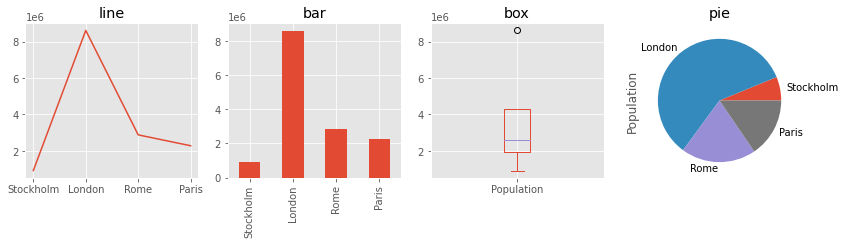

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()

### DataFrame对象

对于二维维数据，Pandas库提供了对应的数据结构DataFrame，它可以看作具有公共索引的Series对象的集合。

#### 创建DataFrame对象

创建DataFrame对象， 可以传递一个嵌套的Python列表或字典给DataFrame构造函数。

In [19]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]])
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [20]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


返回的结果是一种带有行和列的表格类型的数据结构。

类似于Series对象，可以将index属性赋值为标签列表为每行设置标签索引，也可以通过设置columns属性为每列设置标签。

In [21]:
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


在创建DataFrame对象时，可以通过设置相应的关键词参数来设置index和columns对象。

In [22]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


还有另外一种创建DataFrame对象的常用方法，给构造函数传入一个字典，列头是字典的键，每列的数据是字典的值。

In [23]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},)
df

,Population,State
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [24]:
df.index=["Stockholm", "London", "Rome", "Paris"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


#### 索引DataFrame对象

可以使用index和columns属性分别获取DataFrame对象中数据的索引和所有列。

In [25]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [26]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

从DataFrame中提取了一列数据后，将返回一个Series对象。

DataFrame的行可以使用loc索引器属性进行索引，同样也会返回一个Series对象。

In [27]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

给loc索引器传入一个标签列表，将返回一个新的DataFrame对象，内容是原始数据的子集。

In [28]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


loc索引器也可以用来同时选择行和列。

In [29]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

我们还可以使用head方法和tail方法查看表头和表尾数据。

In [30]:
df.head(2)

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom


#### 统计DataFrame对象

In [31]:
df["Population"].mean()

3667653.25

In [32]:
df.info

<bound method DataFrame.info of            Population           State
Stockholm      909976          Sweden
London        8615246  United kingdom
Rome          2872086           Italy
Paris         2273305          France>

### 文件IO

Pandas库提供了多种从不同格式的文件[读取数据的方法](https://pandas.pydata.org/docs/user_guide/io.html)。

[逗号分隔值CSV](https://zh.wikipedia.org/wiki/逗号分隔值)是一种常见的纯文本形式存储表格数据的文件格式。如果对文件的读取和存储有性能要求，可以使用[层级数据格式HDF](https://zh.m.wikipedia.org/zh-hans/HDF)。

下面，我们将使用`read_csv`函数从csv文件中读取数据和创建DataFrame对象。所用数据集为[欧洲城市人口排名](https://en.wikipedia.org/wiki/List_of_cities_in_the_European_Union_by_population_within_city_limits)。

In [33]:
!head european_cities.csv

Rank,City,State,Population,Date of census
1 ,Berlin ,Germany ,"3,664,088" ,31 December 2020
2 ,Madrid ,Spain ,3305408 ,1 January 2021
3 ,Rome ,Italy ,2770226 ,1 January 2021
4 ,Bucharest ,Romania ,2161347 ,1 July 2021
5 ,Paris ,France ,2139907 ,1 January 2022
6 ,Vienna ,Austria ,1951354 ,1 April 2022
7 ,Hamburg ,Germany ,1852478 ,31 December 2020
8 ,Warsaw ,Poland ,1792718 ,30 June 2021
9 ,Budapest ,Hungary ,1723836 ,1 January 2021


注意，英文文本中较长的数字是使用逗号分隔的，导入文本数据时需要格外小心。

In [34]:
df_pop = pd.read_csv("european_cities.csv")
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,Berlin,Germany,"3,664,088",31 December 2020
1,2,Madrid,Spain,3305408,1 January 2021
2,3,Rome,Italy,2770226,1 January 2021
3,4,Bucharest,Romania,2161347,1 July 2021
4,5,Paris,France,2139907,1 January 2022


在进行下一步的数据分析之前，通过打印DataFrame中截取的部分数据，我们可以知道数据大概的样式。

`read_csv`函数默认的delimiter是“,”，默认的header是第一行。这些参数也可以显示地写出来。

In [35]:
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)

使用`info`方法查看数据集的概要。

In [36]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            50 non-null     int64 
 1   City            50 non-null     object
 2   State           50 non-null     object
 3   Population      50 non-null     object
 4   Date of census  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


#### 数据格式处理

在下面的例子中，我们将对DataFrame对象进行一些转换。

apply方法是一个对列进行转换的强大工具。在把一个函数传给某列的apply方法之后，该函数将作用于该列中每个元素，生成一个新的Series对象并返回。

这里我们将传递一个函数，去掉Population列字符串中的“,”，并将其类型转换为int。

In [37]:
def remove_comma(x):
    if type(x) == str:
        x = x.replace(",", "")
    return int(x)

df_pop["Population"] = df_pop.Population.apply(remove_comma)
df_pop.head()

,Rank,City,State,Population,Date of census
0,1,Berlin,Germany,3664088,31 December 2020
1,2,Madrid,Spain,3305408,1 January 2021
2,3,Rome,Italy,2770226,1 January 2021
3,4,Bucharest,Romania,2161347,1 July 2021
4,5,Paris,France,2139907,1 January 2022


In [38]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            50 non-null     int64 
 1   City            50 non-null     object
 2   State           50 non-null     object
 3   Population      50 non-null     int64 
 4   Date of census  50 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


Polulation列转换为了整数类型。

In [39]:
df_pop["State"][2]

'Italy '

我们还需要使用`strip`方法，去掉State和City列中每个元素末尾的空格。

In [40]:
df_pop["State"] = df_pop.State.apply(lambda x: x.strip())
df_pop["City"] = df_pop.City.apply(lambda x: x.strip())
df_pop["State"][2]

'Italy'

#### 数据索引和排序

我们还可以将DataFrame中的数字索引改为其他的列。例如，我们使用City列作为索引。

In [41]:
df_pop2 = df_pop.set_index("City")
df_pop2.head()

,Rank,State,Population,Date of census
City,,,,
Berlin,1,Germany,3664088,31 December 2020
Madrid,2,Spain,3305408,1 January 2021
Rome,3,Italy,2770226,1 January 2021
Bucharest,4,Romania,2161347,1 July 2021
Paris,5,France,2139907,1 January 2022


使用`sort_index`方法，可以将索引作为关键词对所有数据排序。

In [42]:
'''按字母排序'''
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Rank,State,Population,Date of census
City,,,,
Amsterdam,18,Netherlands,905234,31 January 2022
Antwerp,50,Belgium,528903,1 January 2022
Athens,28,Greece,664046,30 June 2011
Barcelona,10,Spain,1636732,1 January 2021
Berlin,1,Germany,3664088,31 December 2020


如果为DataFrame设置了分层索引（hierarchical index），那么还可以将包含多个列名的列表传给`sort_index`方法。

In [43]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head()

,,Rank,Population,Date of census
State,City,,,
Austria,Vienna,6,1951354,1 April 2022
Belgium,Antwerp,50,528903,1 January 2022
Bulgaria,Sofia,13,1308412,31 December 2020
Croatia,Zagreb,23,769944,31 August 2021
Czech Republic,Prague,14,1275406,1 January 2022


这里创建了基于State列和City列的多层索引，`sort_index`方法的参数level=0指定了按照第一个索引（State）排序。

对于有分层索引的DataFrame，可以仅使用第0层索引进行部分定位，也可以使用所有的索引的元组做完全定位。

In [44]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census
City,,,
Gothenburg,39,587549,31 December 2021
Stockholm,16,978770,31 December 2021


In [45]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                            39
Population                  587549
Date of census    31 December 2021
Name: (Sweden, Gothenburg), dtype: object

除了根据索引排序，我们还可以使用sort_values方法，根据某列的内容进行排序。

该方法的参数是DataFrame中的一个列名或者包含多个列名的列表（多层排序）。另外还可以设置关键词参数ascending，取值是Boolean类型数据或者其列表，表示对应的列是使用升序还是降序。

In [46]:
df_pop.set_index("City").sort_values(["State", "Population"], ascending=[False, True]).head(10)

,Rank,State,Population,Date of census
City,,,,
Gothenburg,39,Sweden,587549,31 December 2021
Stockholm,16,Sweden,978770,31 December 2021
Málaga,41,Spain,577405,1 January 2021
Zaragoza,26,Spain,675301,1 January 2021
Seville,25,Spain,684234,1 January 2021
Valencia,21,Spain,789744,1 January 2021
Barcelona,10,Spain,1636732,1 January 2021
Madrid,2,Spain,3305408,1 January 2021
Bucharest,4,Romania,2161347,1 July 2021


#### 数据统计

对于分类的数据，我们可以统计每个分类中数据的数目。例如，对State列进行计数，统计每个国家有多少个城市。

In [47]:
city_counts = df_pop.State.value_counts()
city_counts.head()

Germany        13
Italy           6
Spain           6
Poland          5
Netherlands     3
Name: State, dtype: int64

另一个相关问题，是统计每个国家所有城市的总人口。

第一种方法，使用State和City创建分层索引，然后再某个索引上使用Sum函数。

我们可以使用groupby方法根据给定列的值对DataFrame中的行进行分组，然后对返回的对象进行规约操作（例如sum、mean、min、max等）。

In [48]:
df_pop4 = df_pop.drop("Rank", axis=1).groupby("State").sum().sort_values("Population", ascending=False)
df_pop4.head()

,Population
State,
Germany,13527651
Spain,7668824
Italy,7129402
Poland,4413102
France,3010638


这里使用drop方法从DataFrame中删除了Rank列（axis=1表示列， axis=1表示行）。

#### 画图

为每个国家的城市数量及总人口绘制柱状图。

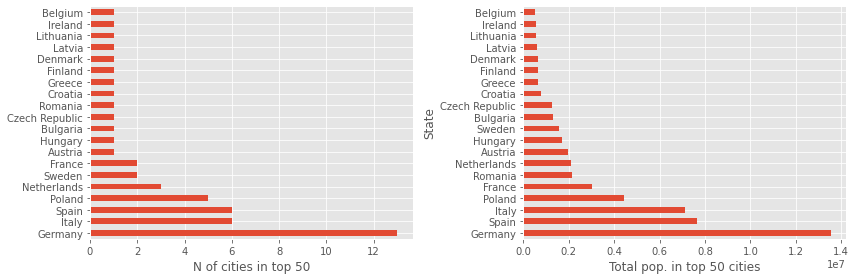

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("N of cities in top 50")
df_pop4.Population.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 50 cities")

fig.tight_layout()

### 时间序列

时间序列是一种很常见的数据形式，数据带有规则或不规则间隔的时间戳，或者以固定或不固定的时间间隔进行排列。

在Pandas中，有专门的数据结构保存此类数据。Series和DataFrame都可以包含时间戳以及时间间隔类型的数据列和索引。

使用Pandas的时间索引DatatimeIndex和PeriodIndex，可以执行日期、时间、周期相关的很多操作。

#### DatatimeIndex类

Pandas的`data_range`方法，可以生成用作索引的日期序列。第一个参数是起始日期，periods参数指定元素个数。

In [50]:
pd.date_range("2022-1-1", periods=31)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

还可以使用前两个参数指定开始和结束时间的字符串，freq参数指定时间间隔。

In [51]:
pd.date_range("2022-1-1 00:00", "2022-1-1 12:00", freq="H")

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               '2022-01-01 10:00:00', '2022-01-01 11:00:00',
               '2022-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

`data_range`返回的DatetimeIndex实例，可以作为Series或DataFrame对象的索引。

In [52]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2022-1-1", periods=31))
ts1.head()

2022-01-01    0
2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
Freq: D, dtype: int64

DatetimeIndex对象的元素可以通过表示日期和时间的字符串作为索引访问。DatetimeIndex对象的元素是Timestamp类型，而Timestamp是Pandas从Python标准库中集成的datetime对象。

In [53]:
ts1["01-02-2022"]

1

Timestamp和datetime对象可以互相转化，两者最明显的区别是Timestamp最小时间戳为纳秒，datatime是毫秒。

In [54]:
ts1.index[1]

Timestamp('2022-01-02 00:00:00', freq='D')

Timestamp类型有相关的属性获取年、月、日等字段。

In [55]:
ts1.index[1].year, ts1.index[1].month, ts1.index[1].day, ts1.index[1].nanosecond

(2022, 1, 2, 0)

也可以使用datetime对象的列表来创建Pandas时间序列：

In [57]:
import datetime

ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])

ts2

2015-01-01    0.383215
2015-02-01    0.118578
dtype: float64

#### PeriodIndex类

以某个时间间隔序列定义的数据可以使用以PeriodIndex类进行索引的Series和DataFrame对象来表示。

In [58]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])
periods

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

In [59]:
ts3 = pd.Series(np.random.rand(3), periods)
ts3

2015-01    0.402887
2015-02    0.630023
2015-03    0.826975
Freq: M, dtype: float64

可以使用`to_period`方法将使用DatetimeIndex对象索引的Series或DataFrame对象转换成PeriodIndex对象：

In [60]:
ts2.to_period('M')

2015-01    0.383215
2015-02    0.118578
Freq: M, dtype: float64

In [61]:
pd.date_range("2022-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12'],
            dtype='period[M]')

#### 温度时间序列示例

我们这里有两个数据文件 temperature_indoor_2014.tsv 和 temperature_indoor_2014.tsv。TSV格式是CSV格式的一种变体，每列数据之间使用Tab符号分隔。

In [62]:
!head -n 5 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


使用`read_csv`函数读取数据文件，需要指定列之间的分隔符为Tab符号。因为本例文件中数据没有列头，我们显式地设置name关键词参数来命名列。

In [63]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [64]:
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


下一步是把[UNIX时间戳](https://zh.m.wikipedia.org/zh/UNIX时间)（UTC1970年1月1日0时0分0秒起至现在的总秒数）转换为日期和时间对象。可以使用`to_datetime`方法，并设置参数unit="s"。

In [65]:
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Asia/Shanghai')
df1.time.head()

0   2014-01-01 07:03:06+08:00
1   2014-01-01 07:13:06+08:00
2   2014-01-01 07:23:07+08:00
3   2014-01-01 07:33:07+08:00
4   2014-01-01 07:43:08+08:00
Name: time, dtype: datetime64[ns, Asia/Shanghai]

In [66]:
df1 = df1.set_index("time")
df1.head()

,outdoor
time,
2014-01-01 07:03:06+08:00,4.38
2014-01-01 07:13:06+08:00,4.25
2014-01-01 07:23:07+08:00,4.19
2014-01-01 07:33:07+08:00,4.06
2014-01-01 07:43:08+08:00,4.06


In [67]:
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Asia/Shanghai')
df2 = df2.set_index("time")
df2.head()

,indoor
time,
2014-01-01 07:03:06+08:00,21.94
2014-01-01 07:13:06+08:00,22.00
2014-01-01 07:23:07+08:00,22.00
2014-01-01 07:33:07+08:00,22.00
2014-01-01 07:43:08+08:00,22.00


使用`DataFrame.plot`函数进行作图，该函数会自动对日期时间索引进行处理。

<AxesSubplot:xlabel='time'>

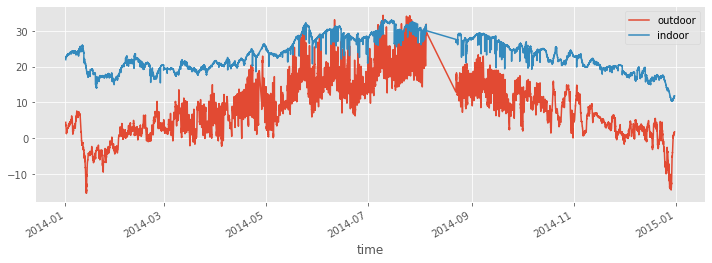

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

可以发现，2014年8月份中旬的数据是缺失的。如何对序列中缺失的数据进行处理也是Pandas库的一项主要工作。

从DataFrame对象的`info`方法中可以获得很多有用信息。在本例中，数据集中有将近5万个数据点。

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 07:03:06+08:00 to 2014-12-31 06:56:35+08:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


针对时间序列的常见操作时选取特定时间的部分数据。例如，我们需要选取1月份的数据。

第一种方法是使用DataFrame的布尔索引为子数据集创建新的DataFrame：

In [70]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4410 entries, 2014-01-01 07:03:06+08:00 to 2014-01-31 23:56:21+08:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4410 non-null   float64
dtypes: float64(1)
memory usage: 68.9 KB


第二种方法是使用切片语句：

In [71]:
df2_jan = df2["2014-1-1":"2014-1-31"]

我们使用plot方法为这两个1月份的子集绘制图形：

<AxesSubplot:xlabel='time'>

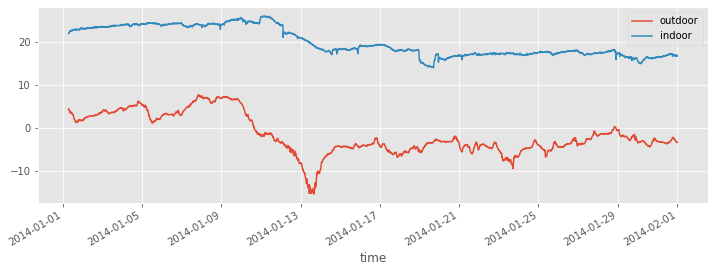

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

如果想处理某个时间段的平均数据（例如月），还可以创建一个新列month，并将DatatimeIndex索引的Timestamp值的month字段赋值给该数列。

In [73]:
df1_month = df1.reset_index()  # 取消索引
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 07:03:06+08:00,4.38,1
1,2014-01-01 07:13:06+08:00,4.25,1
2,2014-01-01 07:23:07+08:00,4.19,1
3,2014-01-01 07:33:07+08:00,4.06,1
4,2014-01-01 07:43:08+08:00,4.06,1


随后，可以按照新的month字段对DataFrame进行分组，并使用`mean`函数计算分组平均值。

In [74]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df1_month.head()

,outdoor
month,
1,-1.755871
2,2.155565
3,4.601717
4,8.083038
5,12.176464


In [75]:
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)

在处理完两个数据集后，可以使用`join`方法把df1_month和df2_month合并到一个DataFrame对象中：

In [76]:
df_month = df1_month.join(df2_month)
df_month.head()

,outdoor,indoor
month,,
1,-1.755871,19.895710
2,2.155565,20.197908
3,4.601717,19.581730
4,8.083038,22.118502
5,12.176464,26.306189


上述数据操作，也可以使用`concat`函数更高效地完成。

In [77]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)
df_month.head()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,outdoor,indoor
time,,
2014-01,-1.755871,19.895710
2014-02,2.155565,20.197908
2014-03,4.601717,19.581730
2014-04,8.083038,22.118502
2014-05,12.176464,26.306189


<AxesSubplot:>

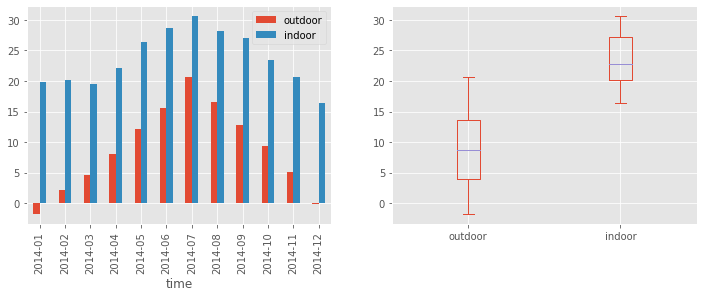

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

#### 重采样

Pandas时间序列对象的一个非常有用的功能是可以使用`resample`方法对数据进行升采样（up-sampling）和降采样（down-sampling）。对于升采样，需要用插值的方法填充缺失值。对于降采样，需要将多个数据点聚合成一个新的样本点。

`resample`方法的第一个参数是一个字符串，用于指定重采样的频率。该方法会返回一个resampler对象，可以调用它的聚合方法，例如mean、sum等，获得重采样的数据。

我们示例中的原始数据的采样频率是10分钟，因为数据点较多，在绘图时需要进行降采样。

我们将使用四种不同的采样频率对温度时间序列进行重采样，并计算每天室内和室外平均温度的差值。

In [79]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]

df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]

df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]

df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]

In [80]:
df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

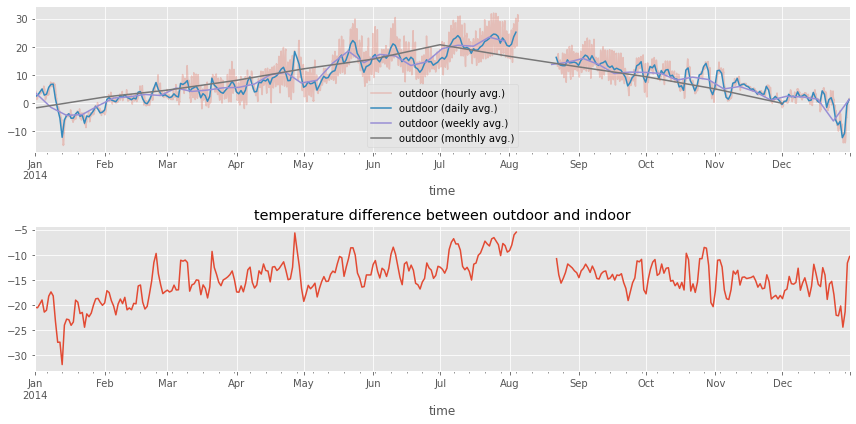

In [81]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()

作为升采样的示例，我们使用三种不同的聚合方法（mean均值、ffill前值、bfill后值），对原始数据以5分钟的频率进行重采样。

In [82]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'mean'}),
           df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

,mean,ffill,bfill
time,,,
2014-01-01 07:00:00+08:00,4.38,NaN,4.38
2014-01-01 07:05:00+08:00,NaN,4.38,4.25
2014-01-01 07:10:00+08:00,4.25,4.38,4.25
2014-01-01 07:15:00+08:00,NaN,4.25,4.19
2014-01-01 07:20:00+08:00,4.19,4.25,4.19


## Seaborn绘图库
---

[Seaborn](https://seaborn.pydata.org/)是构建于matplotlib基础上的高级图形库，主要用于统计分析和数据处理。

在使用Seaborn库之前，可以使用sns.set函数为生成的图形设置样式模板。在下面的代码中，我们使用darkgird样式，该样式使用灰色背景。

In [83]:
sns.set(style="darkgrid")
#sns.set(style="whitegrid")

导入Seaborn库并设置样式会改变matplotlib的图形设置，包括Pandas库生成的图形。我们使用Pandas中DataFrame的`plot`方法重新生成室内和室外温度图，可以发现样式发生了改变。

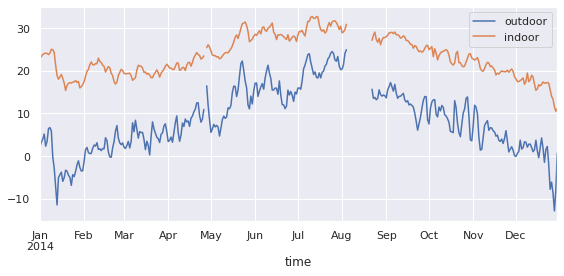

In [84]:
df1 = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df1 = df1.set_index("time").resample("10min").mean()
df2 = pd.read_csv('temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()
df_temp = pd.concat([df1, df2], axis=1)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()

### 统计绘图

除了比较美观之外，Seaborn库的主要优势在于提供了简单易用的图形绘制统计方法。例如[核密度估计图](https://en.wikipedia.org/wiki/Kernel_density_estimation)`kdeplot`和[直方图](https://zh.wikipedia.org/zh-cn/直方图)`histplot`。

直方图

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

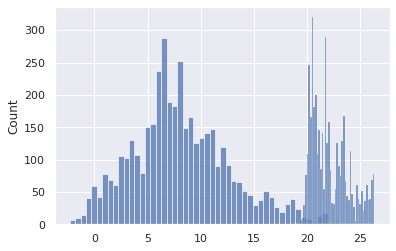

In [85]:
sns.histplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50)
sns.histplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50)

核心密度估计等高线图

<AxesSubplot:xlabel='outdoor', ylabel='indoor'>

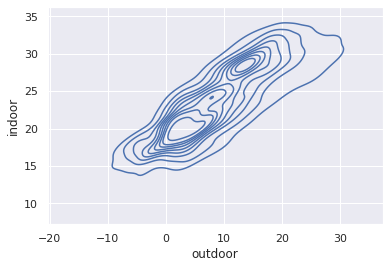

In [86]:
sns.kdeplot(data=df_temp.resample("H").mean().dropna(), x="outdoor", y="indoor", shade=False)

联合分布图

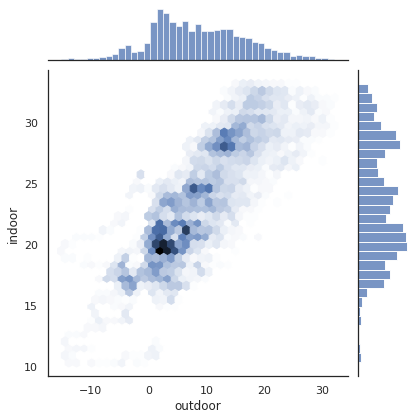

In [87]:
with sns.axes_style("white"):  # 临时格式
    sns.jointplot(data=df_temp.resample("H").mean(), x="outdoor", y="indoor", kind="hex")

### 分类数据

对于分类数据集，比较常用的工具是标准的箱型图，可以对数据的统计信息（最小值、最大值、中位数、四分位数）进行可视化。

标准箱型图的一个变体就是小提琴图，可用箱体的宽度来表示核密度估计值。

<AxesSubplot:xlabel='time', ylabel='outdoor'>

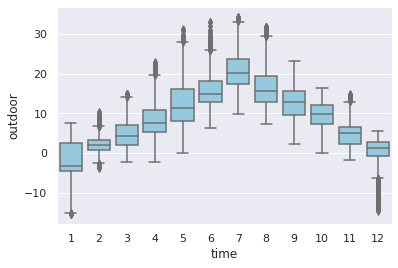

In [88]:
sns.boxplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue")

<AxesSubplot:xlabel='time', ylabel='outdoor'>

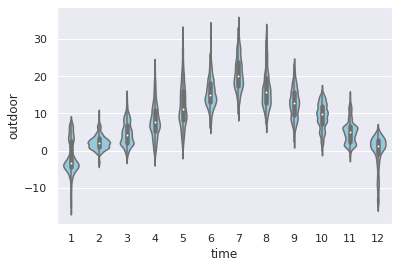

In [89]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue")